# Определение факторов перспективного развития рынка продаж видеоигр

## Описание проекта

***Цель исследования*** - определение факторов, влияющих на перспективное развитие рынка продаж видеоигр для планирования стратегии развития: определение популярного продукта, развитие менее популярных продуктов, планирование бюджета рекламных кампаний.

***Задачи исследования***:

1. Изучение рынка видеоигр в разрезе платформ, объема продаж;
2. Определение факторов, влияющих на рост или падение продаж видеоигр;
3. Разработка рекомендаций для руководства компании с учетом полученных данных.

***Описание данных*** 

Name — название игры 

Platform — платформа 

Year_of_Release — год выпуска 

Genre — жанр игры 

NA_sales — продажи в Северной Америке (миллионы проданных копий) 

EU_sales — продажи в Европе (миллионы проданных копий) 

JP_sales — продажи в Японии (миллионы проданных копий) 

Other_sales — продажи в других странах (миллионы проданных копий) 

Critic_Score — оценка критиков (максимум 100) 

User_Score — оценка пользователей (максимум 10) 

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 

Данные за 2016 год могут быть неполными. 

## Изучение данных из файла

Для того, чтобы понять, какие данные необходимо исследовать, необходимо открыть файлы и понять, что там содержится.

In [1]:
#подключаем все необходимые пакеты

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
#открываем датасет

data = pd.read_csv('/datasets/games.csv', sep = ',')

#выводим первые 10 строк датасета на экран 

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#просмотрим общую информацию о датасете

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Поскольку название столбцов не отличается правилами хорошего стиля, переведем их в соответствие с учетом змеиного регистра.

In [4]:
#приводим название столбцов к змеиному регистру

data = data.rename(columns=lambda x:x.lower())

#выведем первые 10 строк датасета для проверки

data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод

Информация о датасете предварительно изучена, названия столбцов приведены к нижнему регистру. Можно переходить на этап предобработки данных.

## Предобработка данных

### Поиск пропусков и дубликатов. Изменение типов данных

In [5]:
#объявим функцию для поиска и оценки количества и доли пропусков и дубликатов

def data_isna(data): #объявляем функцию data_isna
    print(f'Количество пропусков:{data.isna().sum()}') #с помощью методов isna() и sum() посчитаем количество пропусков
    print(f'Доля пропусков:{data.isna().sum()*100/len(data)}') #с помощью методов isna(),sum() и количества строк посчитаем долю пропусков
    print(f'Количество дубликатов:{data.duplicated().sum()}') #посчитаем количество дубликатов
    print(f'Доля дубликатов:{data.duplicated().sum()*100/len(data)}') #посчитаем долю дубликатов

#изучим количество пропусков и дубликатов в датасете 

data_isna(data)

Количество пропусков:name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
Доля пропусков:name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64
Количество дубликатов:0
Доля дубликатов:0.0


Из представленных данных видно, что в столбцах как с категориальными, так и с количественными значениями пристутствуют пропуски. Прияины возникновения пропусков могут быть различные (некорректная выгрузка данных, намеренное непредоставление или отсутствие данных и др.).

In [6]:
#изучим пропуски в столбце 'name'

data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как мы видим, в столбце 'name' всего два пропущенных значения. Пропуски могли возникнуть из-за любых причин, например, технологических (при выгрузке данных), из-за человеческого фактора (просто забыли указать наименование игры). В любом случае, можно удалить эти пропуски без опасения за искажение результатов исследования.

In [7]:
#удалим пропуски в столбце 'name'

data = data.dropna(subset=['name']).reset_index(drop=True)

In [8]:
#проверим удалены ли пропуски

data['name'].isna().sum()

0

In [9]:
#изучим пропуски в столбце 'year_of_release'

data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Из представленных данных видно, что пропуски в столбце 'year_of_release' составляют более одного процента и могут повлиять на результаты исследования. Чтобы избежать это, заменим пропущенные значения медианным значением, поскольку это самое простое и понятное решение.

In [10]:
#заменим данные в столбце 'year_of_release' медианным значением

data['year_of_release'] = data.groupby('name').transform(lambda x: x.fillna(x.median()))

#выведем первые 10 строк датасета на экран
                                                         
data.head(10)

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [11]:
#проверим количество пропусков в столбце 'year_of_release'

data['year_of_release'].isna().sum()

146

По каким-то причинам у нас осталось 146 пропущенных значений в столбце с данными о годе выпуска игр. Поскольку это совсем немного, удалим эти значения.

In [12]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [13]:
#проверим есть ли пропуски в столбце 'year_of_release'

data['year_of_release'].isna().sum()

0

In [14]:
#переведем данные о годе выпуска игр в целочисленный формат

data['year_of_release'] = data['year_of_release'].astype('int')

In [15]:
#проверим изменился ли формат данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null int64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       8075 non-null float64
user_score         9934 non-null object
rating             9868 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [16]:
#изучим пропуски в столбце 'critic_score'

data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16562,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16563,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16564,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16565,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
#изучим пропуски в столбце 'user_score'

data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16562,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16563,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16564,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16565,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Изучив данные в столбцах с оценками пользователей и критиков, мы видим, что в них есть большое количество пропущенных значений. Вероятнее всего, на некоторые игры просто не были проставлены оценки со стороны пользователей и критиков. Поскольку мы не можем как-то хотя бы приблизительно оценить какими значениями заполнить пропуски в этих столбцах, заменим пропущенные значения нулями.

In [18]:
#изучим часть встречающиеся значения в столбце 'user_score'

data['user_score'].value_counts()

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
9.6       2
0.3       2
1         2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

В столбце с оценками пользователей чаще всего попадается значений 'tbd' (to be defined), что по сути означает то, что значения не определены. Заменим эти значений на NaN.

In [19]:
#заменяем значения 'tbd' на NaN

data = data.replace('tbd', np.nan)

In [20]:
#проверим заменены ли значения

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null int64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       8075 non-null float64
user_score         7540 non-null object
rating             9868 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [21]:
#заменим пропущенные значения в столбцах 'critic_score' и 'user_score' нулевыми значениями

data = data.fillna({'critic_score': 0,
        'user_score': 0})

#посмотрим остались ли пропуски

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6699
dtype: int64

In [22]:
#приведем данные в столбце 'user_score' к вещественному типу

data['user_score'] = data['user_score'].astype('float')

#проверим изменилмя ли тип данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null int64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       16567 non-null float64
user_score         16567 non-null float64
rating             9868 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [23]:
#изучим пропуски в столбце 'rating'

data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16562,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN
16563,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN
16564,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN
16565,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN


В столбце 'rating' содержится большое количество пропусков - 6699 строк. Вероятнее всего, рейтинг просто не был проставлен. Поскольку мы не можем предположить, какими значениями заполнить пропуски в данном столбце, а также учитывая то, что они являются категориальными значениями, заменим пропуски значением 'unknown'.

In [24]:
#заменим пропуски в столбце 'rating' значением 'unknown'

data['rating'] = data['rating'].fillna('unknown')

#проверим значения столбца 'rating'

data['rating'].head(10)

0          E
1    unknown
2          E
3          E
4    unknown
5    unknown
6          E
7          E
8          E
9    unknown
Name: rating, dtype: object

In [25]:
#проверим наличие пропусков в датасете

data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Для проведения исследования нам необходимо добавить данные о суммарных продажах игры в датасет, что и сделаем.

In [26]:
#добавим в датасет данные о суммарных продажах

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']

#выведем первые 10 строк датасета на экран

data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,30.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,unknown,29.68
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,26.08
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,unknown,27.84


### Вывод

В ходе проведения предобработки данных были обнаружены и обработаны пропуски в следующих столбцах:

- 'name' - количество пропусков минимальное (2 строки), были удалены;
- 'year_of_release' - более 1% пропусков, которые были заменены на медианное значение;
- 'critic_score','user_score' - более 1% пропусков, которые были заменены на нулевые значения;
- 'rating' - более 1% пропусков, заменены на значение 'unknown'.

Дубликатов в датасете обнаружено не было. Данные предварительно обработаны и готовы к проведению исследования.

## Исследовательский анализ данных

### Изучение продаж видеоигр по платформам, годам и регионам

Для определения факторов, влияющих на рост или падение продаж видеоигр, необходимо изучить зависимость продаж от платформ, времени выпуска игр, регионов продаж, оценок пользователей и критиков и сделать соответствующие выводы.

In [27]:
#сгруппируем данные по году выпуска игр, платформам и посчитаем количество выпущенных игр.
#Результат сохраним в новом датасете data_games_platforms_by_year

data_games_platforms_by_year = data.groupby(['year_of_release','platform'])['name'].count().reset_index()

#выведем на экран первые 10 строк датасета

data_games_platforms_by_year.head(10)

,year_of_release,platform,name
0,1980,2600,9
1,1981,2600,46
2,1982,2600,36
3,1983,2600,11
4,1983,NES,6
5,1984,2600,1
6,1984,NES,13
7,1985,2600,1
8,1985,DS,1
9,1985,NES,11


Для корректности отображения информации переименуем столбец 'name' в новом датасете в 'number_of_games'.

In [28]:
#переименуем столбец 'name'

data_games_platforms_by_year = data_games_platforms_by_year.rename(columns={'name':'number_of_games'})

#проверим изменения

data_games_platforms_by_year.head(10)

,year_of_release,platform,number_of_games
0,1980,2600,9
1,1981,2600,46
2,1982,2600,36
3,1983,2600,11
4,1983,NES,6
5,1984,2600,1
6,1984,NES,13
7,1985,2600,1
8,1985,DS,1
9,1985,NES,11


Для того, чтобы понять как распределяются продажи видеоигр по годам выпуска игр, необходимо визуализировать данные, т.е. построить график.

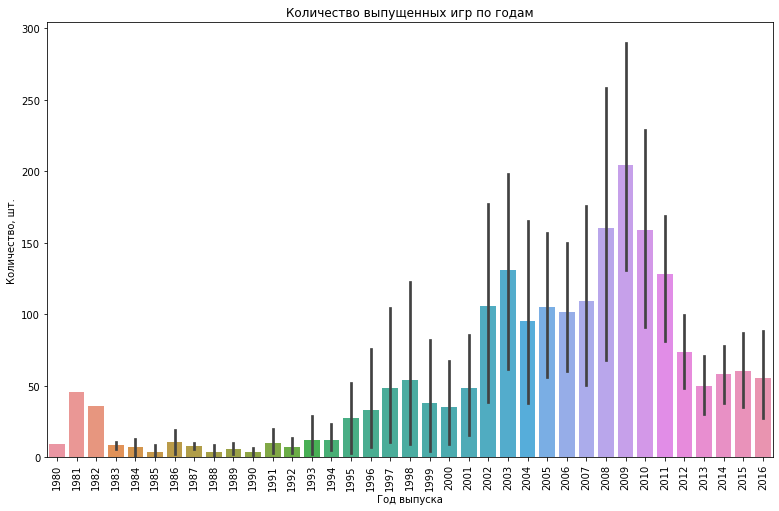

In [29]:
#построим столбчатый график для отображения количества выпущенных игр по годам

plt.figure(figsize=(13,8))
data_barplot = sns.barplot(x='year_of_release',y='number_of_games', #зададим параметры по осям
                           data = data_games_platforms_by_year)

plt.xlabel('Год выпуска'), #добавим подписи осей
plt.ylabel('Количество, шт.'),
plt.title('Количество выпущенных игр по годам') #добавим название графика
plt.xticks(rotation = 90) #добавим угол наклона подписей по оси х
                         
#выведем график на экран

plt.show()

Поскольку график не очень информативен и понятен, для простоты восприятия данных возьмем данные с момента значительного роста продаж видеоигр - с 2002 года по 2016 год и построим новый график.

In [30]:
#сделаем срез данных с 2002 по 2016 гг. Результат поместим в новый датасет data_games_2002_2016

data_games_2002_2016 = data_games_platforms_by_year.query('year_of_release >= 2002 and year_of_release <= 2016')

#выведем первые 10 строк датасета на экран

data_games_2002_2016.head(10)

,year_of_release,platform,number_of_games
109,2002,DC,1
110,2002,GBA,198
111,2002,GC,154
112,2002,N64,1
113,2002,PC,19
114,2002,PS,20
115,2002,PS2,285
116,2002,XB,166
117,2003,GBA,150
118,2003,GC,149


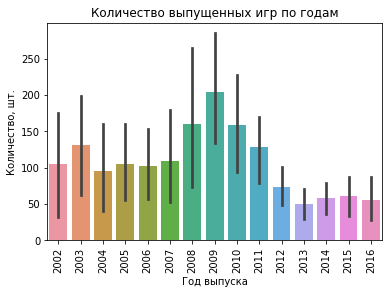

In [31]:
#построим столбчатый график для отображения количества выпущенных игр с 2002 по 2016 гг.

data_barplot = sns.barplot(x='year_of_release',y='number_of_games', #зададим параметры по осям
                           data = data_games_2002_2016) #укажем из какого датасета брать данные

plt.xlabel('Год выпуска'), #добавим подписи осей
plt.ylabel('Количество, шт.'),
plt.title('Количество выпущенных игр по годам') #добавим название графика
plt.xticks(rotation = 90) #добавим угол наклона подписей по оси х
                          
#выведем график на экран

plt.show()

Исходя из графика мы видим, что распределение количества выпущенных игр по годам нельзя назвать нормальным, поскольку колокол несимметричен и распределение не является унимодальным. Пик выпуска видеоигр приходится на период с 2008 по 2011 год, после чего количество выпущенных игр значительно снижается и поддерживается примерно на одном уровне (70-75 шт.) вплоть до 2016 г.

In [32]:
#сгруппируем данные по платформам. Посчитаем суммарные продажи в разрезе платформ и определим
#наиболее прибыльные из них. Результат сохраним в датасете sales_by_platform

sales_by_platform = data.groupby(['platform','year_of_release']).agg({'total_sales': 'sum'}).sort_values('total_sales', ascending=False).reset_index()

#выведем данные на экран

sales_by_platform.head(15)

,platform,year_of_release,total_sales
0,Wii,2009,189.43
1,PS2,2002,186.26
2,PS2,2004,172.79
3,PS2,2003,171.14
4,Wii,2008,162.17
5,PS,1998,160.44
6,X360,2010,156.28
7,PS2,2001,149.65
8,PS2,2005,141.73
9,Wii,2007,139.79


Исходя из данных мы видим, что первые 6 платформ являются лидерами по суммарным продажам видеоигр (1054.88 - 686.89 млн проданных копий). Начиная с платформы GBA суммарные продажи падают сразу в 2 раза до 306,4 млн копий.

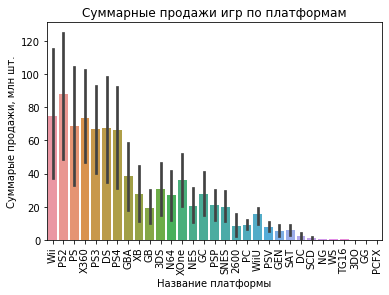

In [33]:
#построим столбчатый график распределения суммарных продаж по платформам

data_total_sales_platform= sns.barplot(x='platform',y='total_sales', #зададим параметры для осей
                                       data = sales_by_platform) #укажем необходимый датасет

plt.xlabel('Название платформы'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.title('Суммарные продажи игр по платформам') #добавим название графика
plt.xticks(rotation = 90) #добавим угол наклона подписей по оси х

#выведем график на экран

plt.show()

Исходя из данных графика видно, что есть 6 прибыльных и популярных платформ, однако большинство из них уже нет в продаже, поэтому изучим данные, начиная с 2013 года.

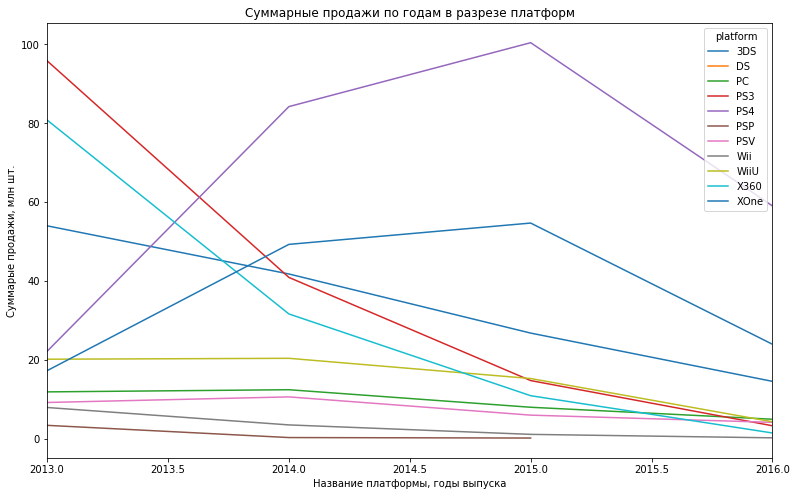

In [34]:
#сделаем срез данных, начиная с 2013 года

sales_by_platform = sales_by_platform.query('year_of_release >= 2013')

#построим график продаж по платформам, начиная с 2013 года

ax = sales_by_platform.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).plot(figsize=(13, 8), title="Суммарные продажи по годам в разрезе платформ")

plt.xlabel('Название платформы, годы выпуска')
plt.ylabel('Суммарые продажи, млн шт.')

#выведем график на экран

plt.show()

Исхдя из данных графика видно, что часть продажа части платформ также идет на спад. В анализе будем использовать платформы нового поколения: PS4, XOne,PC, 3DS.

In [35]:
#добавим популярные платформы в список top_platforms

top_platforms = ['PS4', 'XOne','PC', '3DS']

In [36]:
#сделаем срез данных по топовым платформам. Результат сохраним в датасет sales_by_platform_grouped

sales_by_platform_grouped = data.query('platform in @top_platforms')

#выведем первые 10 строк датасета на экран

sales_by_platform_grouped.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,unknown,12.25
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,unknown,13.82
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,11.74
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,unknown,10.94
53,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E,10.03
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.27
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,8.78
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T,7.41


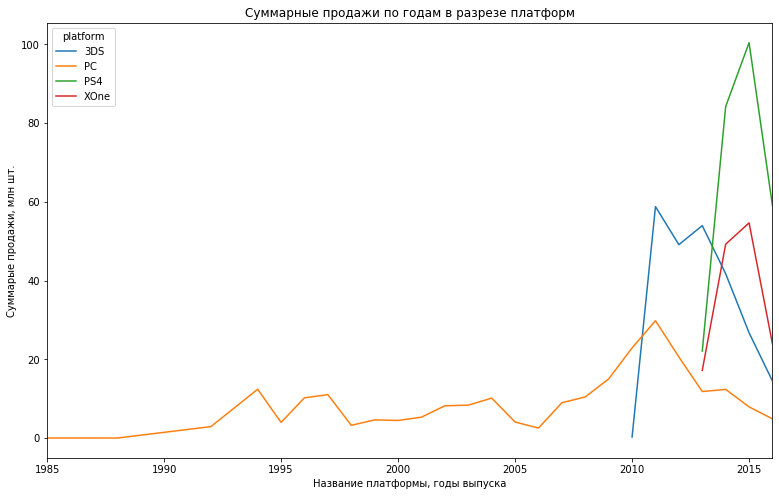

In [37]:
#построим график по продажам игр на топовых платформах

ax = sales_by_platform_grouped.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).plot(figsize=(13, 8), title="Суммарные продажи по годам в разрезе платформ")

plt.xlabel('Название платформы, годы выпуска')
plt.ylabel('Суммарые продажи, млн шт.')

#выведем график на экран

plt.show()

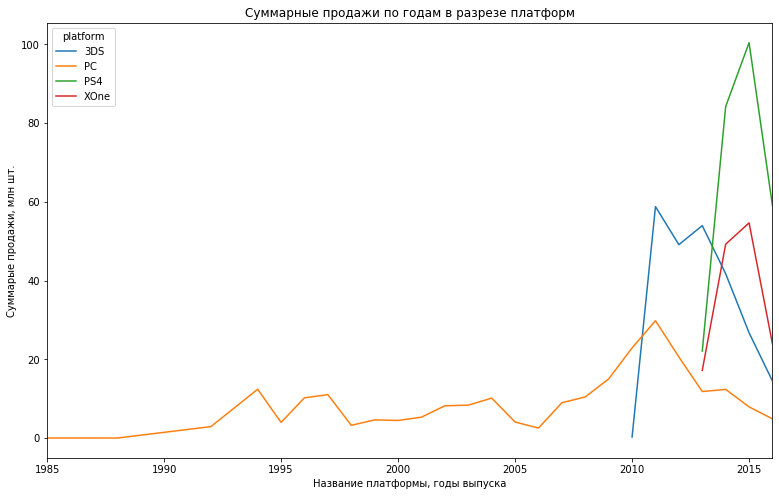

In [38]:
# Код ревьюера

ax = sales_by_platform_grouped.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).plot(figsize=(13, 8), title="Суммарные продажи по годам в разрезе платформ")

plt.xlabel('Название платформы, годы выпуска')
plt.ylabel('Суммарые продажи, млн шт.')

plt.show()

Проанализировав продажи по самым популярным продажам видно, что продажи игр на всех платформах пошли на резкий спад, начиная с 2013-2015 года, за исклюение РС, у которой наблюдается спад, но не такой резкий. Из графика также видно, что в среднем платформы находятся на пике популярности по 3-4 года. С этим вероятнее всего и связан спад продаж. Однако, необходимо рассчитать среднюю 'продолжительность жизни' платформы.

In [39]:
#рассчитаем среднюю продолжительность жизни платформы

platform_life_circle = (sales_by_platform_grouped.groupby('platform')['year_of_release']\
                        .max() - sales_by_platform_grouped.groupby('platform')['year_of_release']\
                        .min()).mean().round()

#выведем полученный результат на экран

platform_life_circle 

13.0

На мой взгляд, 13 лет - достаточно долго для жизни платформы, поэтому возьмем срок в 3 года, что в принципе и видно на линейном графике, построенном выше.

In [40]:
#сделаем срез для анализа с учетом года выпуска игр и самых популярных платформ. Результат сохраним
#в новом датасете sales_top_three_platforms

sales_top_platforms =  sales_by_platform_grouped\
                            .query('year_of_release >= 2013 and platform in @top_platforms')
    
#выведем первые 10 строк датасета на экран

sales_top_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,unknown,12.25
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,unknown,13.82
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,unknown,10.94
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,unknown,6.70
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,6.43
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,6.49
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,0.0,0.0,unknown,7.07
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0.0,0.0,unknown,6.71


Для того, чтобы изучить суммарные продажи по трем популярным платформам, построим график "ящик с усами".

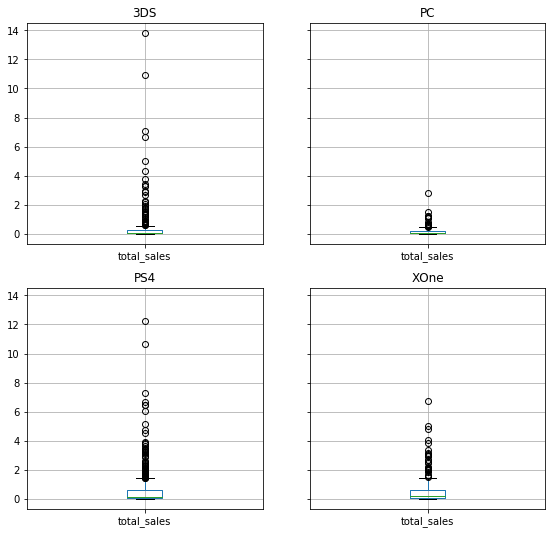

In [41]:
#построим график "ящик с усами" для трех популярных платформ

sales_top_platforms.groupby('platform').boxplot(column = 'total_sales', figsize = (9,9))

#выведем график на экран

plt.show()

График "ящик с усами" получился визуально не очень понятный для восприятия, однако можно отметить, что в случае всех трех платформ существуют аномальные значения суммарных продаж, т.е. выбросы. Для того, чтобы лучше изучить данные, посмотрим описательные статистики.

In [42]:
#посмотрим характеристики сцммарных продаж по платформам

sales_top_platforms.groupby('platform')['total_sales'].describe().reset_index()

,platform,count,mean,std,min,25%,50%,75%,max
0,3DS,303.0,0.452046,1.307354,0.01,0.04,0.09,0.2650,13.82
1,PC,192.0,0.192865,0.320712,0.01,0.03,0.07,0.2100,2.82
2,PS4,392.0,0.678036,1.355221,0.01,0.05,0.17,0.6125,12.25
3,XOne,247.0,0.587247,0.942412,0.01,0.05,0.20,0.6250,6.71


Как мы видим, среднее значение по суммарным продажам платформ 3DS,PS4,XOne примерно одинаковое (0,45, 0,67 и 0,59 млн копийй соответственно).Отличительной особенностью данных является показатель стандартного отклонения по платформам 3DS и PS4, который значительно превышает значение этого показателя по двум другим платформам (1,31 и 1,36 млн копий соответственно). Это говорит о том, что значения суммарных продаж по этим платформам имеют более широкий разброс. 

В ходе проведения исследования нам необходимо найти зависимость между отзывами пользователей и критиков и суммарными продажами видеоигр в разрезе платформ.

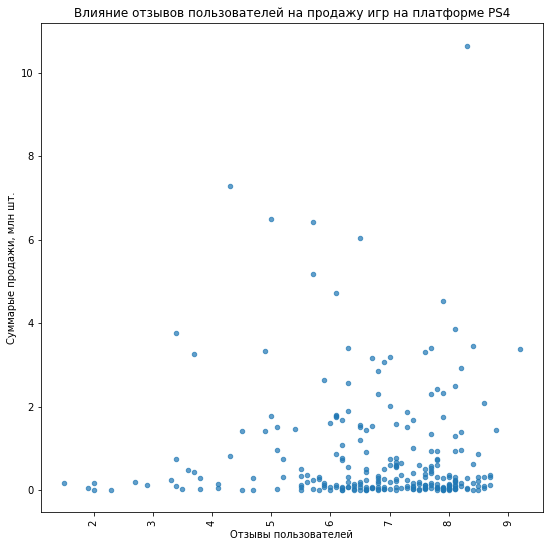

In [43]:
#сделаем срез данных по платформе PS4. Исключим нудевые оценки пользователей и критиков из среза

sales_ps4 = sales_top_platforms.query('platform == "PS4" and user_score !=0 and critic_score !=0')

#построим диаграмму рассеяния зависимости отзывов пользователей на продажу игр на платформе PC

sales_ps4.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', figsize=(9,9), #зададим все необходимые параметры
          alpha = 0.7, title = 'Влияние отзывов пользователей на продажу игр на платформе PS4')
     


plt.xlabel('Отзывы пользователей'), #добавим полписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона подписей по оси х

#выведем график на экран

plt.show()

Из графика мы видим, что большинство значений суммарных продаж стремится к нулю. Корреляция между отзывами пользователей и продажами видеоигр слабая, однако это можно подтвердить рассчитав коэффициент корреляции. Стоит помнить о том, что у нас было большое количество пропущенных значений в столбце со значениями оценок пользователей, что также могло сказаться на результате анализа этого показателя. 

In [44]:
#посчитаем коэффициент корреляции между отзывами пользователей и суммарными продажами видеоигр на 
#платформе PS4

print('Коэффициент корреляции между отзывами пользователей и продажами игр на платформе PS4:',sales_ps4['total_sales'].corr(sales_ps4['user_score']).round(2))

Коэффициент корреляции между отзывами пользователей и продажами игр на платформе PS4: -0.03


Как и следовало ожидать, корреляция между отзывами пользователей и суммарными продажами видеоигр на 
платформе PC слабая.

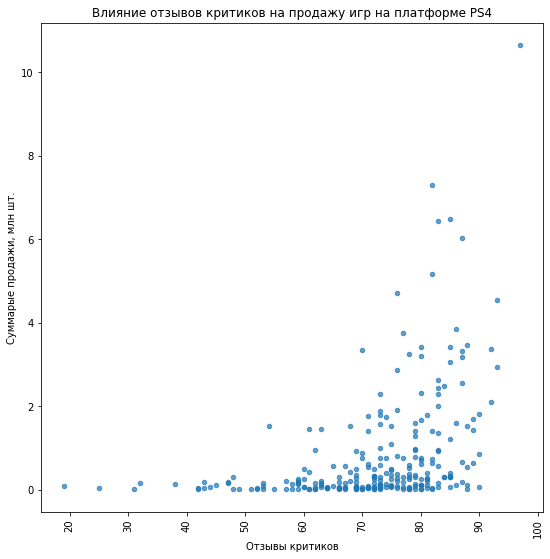

In [45]:
#построим диаграмму рассеяния зависимости отзывов критиков на продажу игр на платформе PS4

sales_ps4.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', #зададим все необходимые параметры
                                       figsize=(9,9), alpha = 0.7, 
                                       title = 'Влияние отзывов критиков на продажу игр на платформе PS4')
     


plt.xlabel('Отзывы критиков'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона подписей по оси х

#выведем график на экран

plt.show()

Из графика видно, что ситуация с отзывами критиков аналогична той, что сложилась с отзывами пользователей: корреляция будет слабой. Посчитаем коэффициент корреляции.

In [46]:
#посчитаем коэффициент корреляции между отзывами критиков и суммарными продажами видеоигр на 
#платформе PS4

print('Коэффициент корреляции между отзывами критиков и продажами игр на платформе PS4:',sales_ps4['total_sales'].corr(sales_ps4['critic_score']).round(2))

Коэффициент корреляции между отзывами критиков и продажами игр на платформе PS4: 0.41


Как и ожидалось, взасимосвязь отзывов критиков и суммарных продаж на платформе PS4 слабая, но в отличии от корреляции суммарных продаж и отзывов пользователей, она положительная.
В ходе исследования необходимо проверить, как отзывы пользователей и критиков влияют на продажи видеоигр на других платформах, поскольку ситуация с продажами на платформе PS4 может быть исключительной.

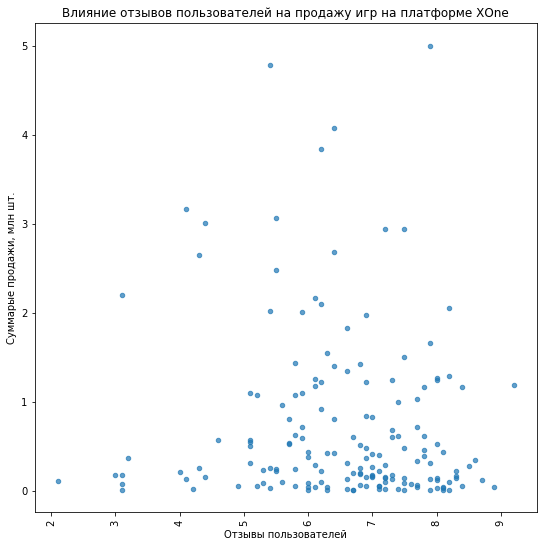

In [47]:
#сделаем срез данных по платфрме XOne. Исключим из анализа нулевые значения рейтингов

sales_xone = sales_top_platforms.query('platform == "XOne" and user_score !=0 and critic_score !=0')

#построим диаграмму рассеяния зависимости отзывов пользователей на продажу игр на платформе XOne

sales_xone.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', figsize=(9,9), #зададим все необходимые параметры
          alpha = 0.7, title = 'Влияние отзывов пользователей на продажу игр на платформе XOne')
     


plt.xlabel('Отзывы пользователей'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона подписей на оси х

#выведем график на экран

plt.show()

In [48]:
#посчитаем коэффициент корреляции между отзывами пользователей и суммарными продажами видеоигр на 
#платформе XOne

print('Коэффициент корреляции между отзывами пользователей и продажами игр на платформе XOne:',sales_xone['total_sales'].corr(sales_xone['user_score']).round(2))

Коэффициент корреляции между отзывами пользователей и продажами игр на платформе XOne: -0.09


Как мы видим из визуализированных данных и коэффициента корреляции, зависимость между отзывами пользователей и суммарными продажами видеоигр на платформе XOne ниже, чем на платформе PS4, но также отрицательна и составляет всего -0,09.

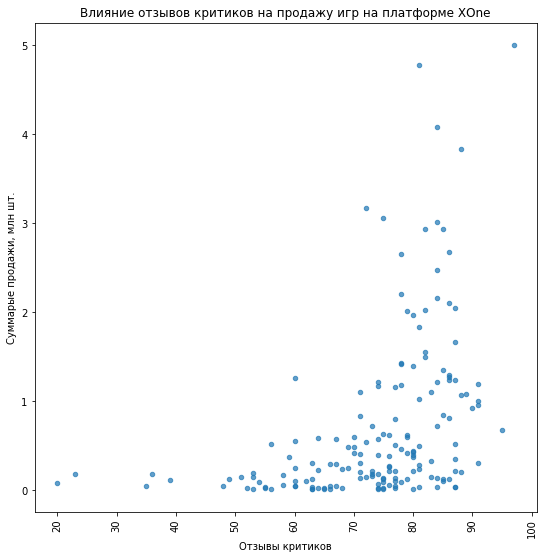

In [49]:
#построим диаграмму рассеяния зависимости отзывов критиков на продажу игр на платформе XOne

sales_xone.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize=(9,9), #зададим все необходимые параметры
          alpha = 0.7, title = 'Влияние отзывов критиков на продажу игр на платформе XOne')
     


plt.xlabel('Отзывы критиков'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона подписей на оси х

#выведем график на экран

plt.show()

In [50]:
#посчитаем коэффициент корреляции между отзывами критиков и суммарными продажами видеоигр на 
#платформе XOne

print('Коэффициент корреляции между отзывами критиков и продажами игр на платформе XOne:',sales_xone['total_sales'].corr(sales_xone['critic_score']).round(2))

Коэффициент корреляции между отзывами критиков и продажами игр на платформе XOne: 0.41


Из данных графика и значения коэффициента корреляции видно, что зависимость отзывов критиков и суммарных продаж слабая.

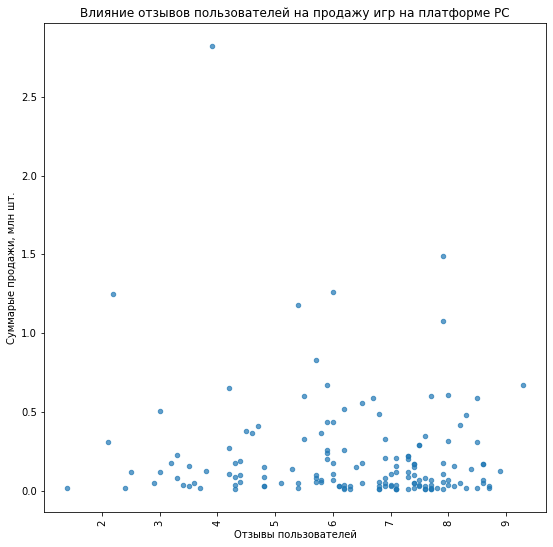

In [51]:
#сделаем срез данных по платфрме PC. Исключим нулевые значения рейтингов

sales_pc = sales_top_platforms.query('platform == "PC" and user_score !=0 and critic_score !=0')

#построим диаграмму рассеяния зависимости отзывов пользователей на продажу игр на платформе PC

sales_pc.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', figsize=(9,9), #зададим все необходимые параметры
          alpha = 0.7, title = 'Влияние отзывов пользователей на продажу игр на платформе PC')
     


plt.xlabel('Отзывы пользователей'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона по оси х

#выведем график на экран

plt.show()

In [52]:
#посчитаем коэффициент корреляции между отзывами пользователей и суммарными продажами видеоигр на 
#платформе PC

print('Коэффициент корреляции между отзывами пользователей и продажами игр на платформе PC:',sales_pc['total_sales'].corr(sales_pc['user_score']).round(2))

Коэффициент корреляции между отзывами пользователей и продажами игр на платформе PC: -0.1


Из данных графика и значения коэффициента корреляции видно, что зависимость отзывов пользователей и суммарных продаж слабая. Возможно, это связано с нелийненым характером зависимости.

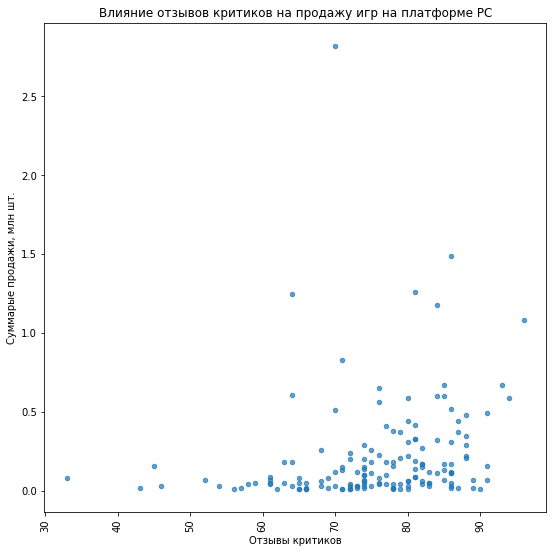

In [53]:
#построим диаграмму рассеяния зависимости отзывов критиков на продажу игр на платформе PC

sales_pc.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize=(9,9), #зададим все необходимые параметры
          alpha = 0.7, title = 'Влияние отзывов критиков на продажу игр на платформе PC')
     


plt.xlabel('Отзывы критиков'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона по оси х

#выведем график на экран

plt.show()

In [54]:
#посчитаем коэффициент корреляции между отзывами критиков и суммарными продажами видеоигр на 
#платформе PC

print('Коэффициент корреляции между отзывами критиков и продажами игр на платформе PC:',sales_pc['total_sales'].corr(sales_pc['critic_score']).round(2))

Коэффициент корреляции между отзывами критиков и продажами игр на платформе PC: 0.2


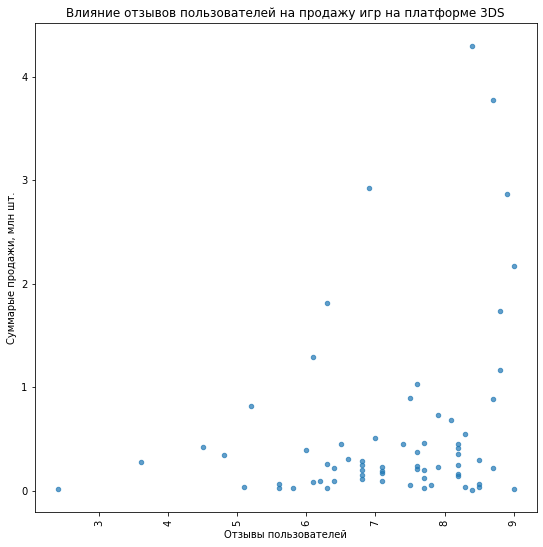

In [55]:
#сделаем срез данных по платфрме 3DS. Исключим нулевые значения рейтингов

sales_3ds = sales_top_platforms.query('platform == "3DS" and user_score !=0 and critic_score !=0')

#построим диаграмму рассеяния зависимости отзывов пользователей на продажу игр на платформе PC

sales_3ds.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', figsize=(9,9), #зададим все необходимые параметры
          alpha = 0.7, title = 'Влияние отзывов пользователей на продажу игр на платформе 3DS')
     


plt.xlabel('Отзывы пользователей'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона по оси х

#выведем график на экран

plt.show()

In [56]:
#посчитаем коэффициент корреляции между отзывами пользователей и суммарными продажами видеоигр на 
#платформе 3DS

print('Коэффициент корреляции между отзывами пользователей и продажами игр на платформе 3DS:',sales_3ds['total_sales'].corr(sales_3ds['user_score']).round(2))

Коэффициент корреляции между отзывами пользователей и продажами игр на платформе 3DS: 0.27


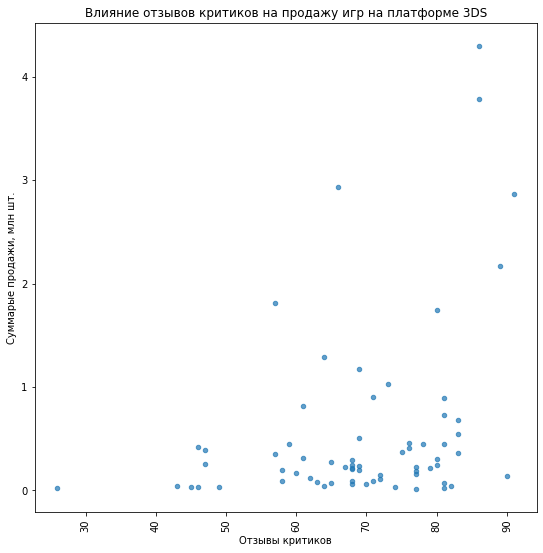

In [57]:
#построим диаграмму рассеяния зависимости отзывов критиков на продажу игр на платформе PC

sales_3ds.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize=(9,9), #зададим все необходимые параметры
          alpha = 0.7, title = 'Влияние отзывов критиков на продажу игр на платформе 3DS')
     


plt.xlabel('Отзывы критиков'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона по оси х

#выведем график на экран

plt.show()

In [58]:
#посчитаем коэффициент корреляции между отзывами критиков и суммарными продажами видеоигр на 
#платформе 3DS

print('Коэффициент корреляции между отзывами критиков и продажами игр на платформе 3DS:',sales_3ds['total_sales'].corr(sales_3ds['critic_score']).round(2))

Коэффициент корреляции между отзывами критиков и продажами игр на платформе 3DS: 0.34


Из данных графика и значения коэффициента корреляции видно, что зависимость отзывов критиков и суммарных продаж слабая. Возможно, это связано с нелийненым характером зависимости и для изучения взаимосвязи этих двух показателей необходимо использовать другие методы анализа.

В ходе анализа изучим зависимость жанров на суммарные продажи видеоигр.

In [59]:
#сгруппируем данные по суммарным продажам по жанрам, рассчитаем суммарные продажи по жанрам,
#отсортируем полученный показатель в порядке убывания и сохраним результат в датасет total_sales_by_genres

total_sales_by_genres = sales_top_platforms.groupby('genre')['total_sales']\
                        .agg({'total_sales':'sum'}).sort_values(by='total_sales',\
                                                                ascending = False).reset_index()
#выведем датасет на экран

total_sales_by_genres

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """


,genre,total_sales
0,Action,155.42
1,Shooter,138.56
2,Role-Playing,103.49
3,Sports,74.69
4,Misc,21.19
5,Racing,20.22
6,Simulation,18.31
7,Fighting,17.33
8,Platform,15.66
9,Adventure,11.56


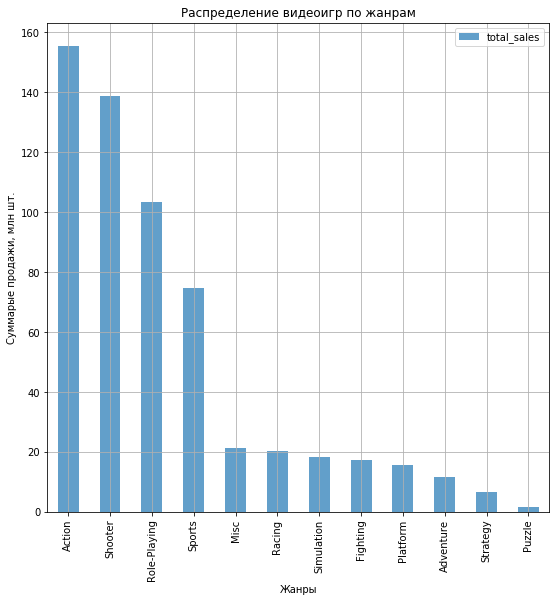

In [60]:
#построим график распределения суммарных продаж по жанрам

total_sales_by_genres.plot(kind = 'bar', x = 'genre', y = 'total_sales', grid = True, figsize=(9,9), 
          alpha = 0.7, title = 'Распределение видеоигр по жанрам') #зададим все необходимые параметры

plt.xlabel('Жанры'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона значений по оси х

#выведем график на экран

plt.show()

Исходя из данных датасета и графика мы видим, что жанры влияют на продажи видеоигр. Самыми популярными сожно назвать 4 жанра: экшн, спортивные игры, шутеры и игры в жанре аркада (misc).

### Вывод

Изучив данные по суммарным продажам в разрезе платформ и года выпуска видеоигр можно сделать следующие выводы:

1. На данный момент есть всего 4 платформы, которые потенциально прибыльны и популярны: PS4, XOne,PC и 3DS. Остальные платформы изжили себя: объем продаж игр на них либо стремится к нулю, либо вовсе прекращен;

2. Средняя продолжительность "жизни" платформы - 3 года;

3. Ни оценки пользователей, ни оценки критиков не оказывают большого влияния на рост или падение продаж видеоигр, чего нельзя сказать о жанрах. Самыми прибыльными жанрами являются: экшн, спорт, шутеры и аркада.

## Составление портета пользователя каждого региона

Для выработки рекомендаций по повышению продаж видеоигр, необходимо составить некий "портрет" пользователя в зависимости от региона. Для начала изучим показатель суммарных продаж игр по регионам.

In [61]:
#посчитаем суммарное количество продаж в разрезе платформ и регионов, а также долю продаж

def sales_by_region(colname_1: str, colname_2: str): #объявим функцию, зададим условия в теле функции
    df = data.groupby(colname_1)[colname_2].agg({colname_2:'sum'}).sort_values(by = colname_2,ascending = False).reset_index()
    df['%_sales'] = (data[colname_2]/data['total_sales']*100).round(2)
    print(df.head()) #выведем результат работы функции на экран

In [62]:
#изучим продажи игр в Северной Америке

sales_by_region('platform','na_sales')

  platform  na_sales  %_sales
0     X360    599.15    55.82
1      PS2    580.09    73.68
2      Wii    494.01    48.65
3      PS3    391.60    52.35
4       DS    381.38    37.10


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.


In [63]:
#изучим продажи игр в Европе

sales_by_region('platform','eu_sales')

  platform  eu_sales  %_sales
0      PS2    337.05    39.09
1      PS3    328.97     9.07
2     X360    269.79    39.59
3      Wii    261.48    36.65
4       PS    212.39    29.26


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.


In [64]:
#изучим продажи игр в Японии

sales_by_region('platform','jp_sales')

  platform  jp_sales  %_sales
0       DS    175.02     5.09
1       PS    139.78    17.25
2      PS2    137.74    11.76
3     SNES    116.55    11.00
4      3DS    100.64    33.64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.


Из представленных данных видно, что в зависимости от региона, есть различия популярности платформ для игр, а именно:

- для Северной Америки характерна популярность платформ X360 (599,15 млн проданных копий или 55,82% от всех проданных игр на этой платформе). Это неудивительно, поскольку платформа X360 является разработкой компании Microsoft. Вторая по популярности платформа - PS2 (580,09 млн проданных копий или 73,68% от всех проданных копий на этой платформе). Платформа PS2 частично также была разработана в Америке, чем можно объяснить ее популярность. Наименее популярными платформами являются: PS3, DS и Wii. Это объясняется тем, что PS3 вышла изначально в Японии и получила меньшее распространение в США, DS - это французская разработка, которая не актуальна на данный момент (продажи не ведутся с 2013 г.) и Wii - это разработка японской Nintendo преимущественно для азиатского рынка.

- для Европы ситуация несколько похожа на ту, что сложилась в Северной Америке. самыми популярными платформами являются PS2 и X360 (337.05 млн проданных копий или 39,09% от общих продаж игр на платформе и 269,79 млн проданных копий или 39,59% от общих продаж игр на платформе соответственно). Наименее популярными платформами являются: PS (морально устарела) и PS3.

- для Японии ситуация в корне отличается. Самыми популярными являются платформы DS и PS (175,02 млн проданных копий или 5,09% от всех проданных на платформе игр и 139,78 млн проданных копий или 17,25% от всех проданных игр на платформе соответстенно). Возможно влияние на такую популярностью относительно старых платформ оказывает консервативность японцев (считают старые платформы лучше новых версий), то, что платформа DS получила распространение в Японии позже, чем в Европе, а также, возможно, имеет значение предпочитаемые жанры игр, что мы проверим дальше. 

In [65]:
#изучим жанровые предпочтения пользователей в различных регионах

def genres_by_region(colname_1: str, colname_2: str): #объявим функцию, зададим условие в теле функции
    df = data.groupby(colname_1)[colname_2].agg({colname_2:'sum'}).sort_values(by = colname_2,ascending = False).reset_index()
    print(df.head()) #выведем результат работы функции на экран

In [66]:
#изучим жанровые предпочтения пользователей в Северной Америке

genres_by_region('genre', 'na_sales')

      genre  na_sales
0    Action    873.70
1    Sports    681.69
2   Shooter    590.35
3  Platform    444.44
4      Misc    401.69


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.


In [67]:
#изучим жанровые предпочтения пользователей в Европе

genres_by_region('genre', 'eu_sales')

     genre  eu_sales
0   Action    517.58
1   Sports    375.60
2  Shooter    316.96
3   Racing    235.47
4     Misc    211.32


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.


In [68]:
#изучим жанровые предпочтения пользователей в Японии

genres_by_region('genre', 'jp_sales')

          genre  jp_sales
0  Role-Playing    353.88
1        Action    160.15
2        Sports    135.27
3      Platform    130.71
4          Misc    108.04


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.


Исходя из полученных данных видно, что существуют различия в жанровых предпочтениях пользователей по регионам:

1. В Америке самыми популярными жанрами являются: экшн, спортивные игры, шутеры, платформеры и аркада.

2. В Европе топ-5 жанров похожи: экшн, спорт,шутеры,гонки и аркада.

3. Предпочтения у японцев несколько отличаются и топ-5 составляют: ролевые игры, экшн, спорт, платформеры и аркада.

Вероятнее всего, жанровые предпочтения зависят от культурных аспектов жизни и взглядов американцев, европейцев и японцев.

Изучим влияние рейтинга ESRB на продажи видеоигр.

In [69]:
#изучим влияние рейтинга ESRB в разрезе регионов

def esrb_influence(colname_1: str, colname_2: str): #объявим функцию, зададим все необходимые параметры
    df = data.groupby(colname_1)[colname_2].agg({colname_2:'sum'}).sort_values(by = colname_2,ascending = False).reset_index()
    print(df) #выведем результат работы функции на экран

In [70]:
#изучим влияние рейтинга на пользователей из Северной Америки

esrb_influence('rating', 'na_sales')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.


    rating  na_sales
0        E   1288.00
1  unknown   1229.15
2        T    751.26
3        M    746.95
4     E10+    352.56
5      K-A      2.56
6       EC      1.53
7       AO      1.26
8       RP      0.00


In [71]:
#изучим влияние рейтинга на пользователей из Европы

esrb_influence('rating', 'eu_sales')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.


    rating  eu_sales
0        E    709.20
1  unknown    610.40
2        M    483.17
3        T    423.56
4     E10+    188.34
5       AO      0.61
6      K-A      0.27
7       EC      0.11
8       RP      0.04


In [72]:
#изучим влияние рейтинга на пользователей из Японии

esrb_influence('rating', 'jp_sales')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.


    rating  jp_sales
0  unknown    838.39
1        E    198.02
2        T    150.88
3        M     63.61
4     E10+     40.20
5      K-A      1.46
6       AO      0.00
7       EC      0.00
8       RP      0.00


Изучив данные о влиянии рейтинга ESRB можно сделать следующие выводы:

- на продажи игр в Америке рейтинг возможно влияет. Возможно, поскольку мы не знаем значения рейтинга 1229 млн проданных копий игр. Однако, остальные значения более 2-х тысяч имеют данные о рейтинге.

- такая же ситуация с вилиянием рейтинга на продажи игр в Европе. Большая часть данных неизвестна, поэтому сложно сделать однозначный вывод о зависисмости продаж игр и рейтинга ESRB.

- по пользователям Японии также невозможно сделать вывод о влиянии рейтинга из-за того, что большая часть данных неизвестна.

### Вывод

Изучив поведение пользователей по регионам можно сказать следующее:
    
- "портрет" пользователя из Северной Америки выглядит так: пользователь любого возраста или подросток, предпочитающий игры в жанре экшн, спорт, шутер, платформер или аркада на платформах X360 или PS2.

- "портрет" пользователя из Европы - это  пользователь любого возраста или взрослый, предпочитающий игры в жанре экшн, спорт, шутер, гонки или аркада на платформах PS2 или X360.

- "портрет" пользователя из Японии: пользователь любого возраста, предпочитающий игры в жанре ролевые, экшн, спорт, платформер или аркада на платформах DS или PS.

## Проверка гипотез

В ходе проведения исследования необходимо проверить две гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2. Средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки первой гипотезы сформулируем нулевую и альтернативную гипотезы:

Н0: средние пользовательские рейтинги платформ XOne и PC равны.

Н1: средние пользовательские рейтинги платформ XOne и PC не равны.

Поскольку у нас представлены две независимые выборки данных, то будем использовать метод t-теста Стьюдента, который вернет нам разницу распределения значений средних показателей двух независимых выборок.

Поскольку есть принятые допустимые уровни статистической значимости (5% и 1%), то выберем один из них, например, 5%.

In [73]:
#сформируем первую выбору по платформе XOne

sample_1 = data.query('platform == "XOne"')

#выведем первые 10 строк датасета на экран

sample_1.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0.0,0.0,unknown,6.71
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.00
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,4.78
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.08
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,3.84
342,Star Wars Battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,0.0,0.0,unknown,3.34
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.17
398,Destiny,XOne,2014,Shooter,2.14,0.92,0.00,0.31,75.0,5.5,T,3.06
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,2.94
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.01


In [74]:
#сформируем первую выбору по платформе PC

sample_2 = data.query('platform == "PC"')

#выведем первые 10 строк датасета на экран

sample_2.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T,7.41
138,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.00,0.00,93.0,7.3,T,6.29
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.00,0.54,88.0,4.0,M,4.60
195,Microsoft Flight Simulator,PC,1996,Simulation,3.22,1.69,0.00,0.20,0.0,0.0,unknown,4.91
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,2.57,1.68,0.00,0.58,93.0,8.2,T,4.25
273,Warcraft II: Tides of Darkness,PC,1995,Strategy,1.70,2.27,0.00,0.23,0.0,0.0,unknown,3.97
284,Half-Life,PC,1997,Shooter,4.03,0.00,0.09,0.00,96.0,9.1,M,4.12
288,World of Warcraft: The Burning Crusade,PC,2007,Role-Playing,2.57,1.52,0.00,0.00,91.0,7.9,T,4.09
313,The Elder Scrolls V: Skyrim,PC,2011,Role-Playing,1.16,2.12,0.00,0.60,94.0,8.1,M,3.28
330,The Sims: Unleashed,PC,2002,Simulation,2.03,1.56,0.00,0.17,79.0,8.0,T,3.59


In [75]:
#зададим уровень статистической значимости

alpha = .05

In [76]:
#проведем проверку первой гипотезы, используя метод st.ttest_ind. В качестве аргументов передадим
#данные выборок, распределение значений которых необходимо изучить

results = st.ttest_ind(
    sample_1['user_score'],
    sample_2['user_score']
)

print('p-значение:', results.pvalue) #выводим на экран значение p-value

if (results.pvalue < alpha): #сравниваем значение p-value  заданный уровень статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Средний пользовательский рейтинг платформы XOne:', sample_1['user_score'].mean().round())
print('Средний пользовательский рейтинг платформы PC:', sample_2['user_score'].mean().round())

p-значение: 0.0006171371903381416
Отвергаем нулевую гипотезу

Средний пользовательский рейтинг платформы XOne: 5.0
Средний пользовательский рейтинг платформы PC: 6.0


Как мы видим, средние пользовательские рейтинги по платформам не равны, поэтом уесть основание отвергнуть нулевую гипотезу.

Сформулируем нулевую и альтернативную гипотезы для проверки второй гипотезы: 

Н0: средние пользовательские рейтинги жанров Action и Sports равны.

Н1: средние пользовательские рейтинги жанров Action и Sports не равны.

In [77]:
#сделаем срез данных по жанру Action

sample_1 = data.query('genre == "Action"')

#выведем первые 10 строк датасета на экран

sample_1.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,10.24
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,14.37
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,11.80
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,4.34,2.71,3.96,0.76,0.0,0.0,unknown,11.01
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,9.97
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,8.89
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,6.20


In [78]:
#сделаем срез данных по жанру Sports

sample_2 = data.query('genre == "Sports"')

#выведем первые 10 строк датасета на экран

sample_2.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,20.55
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,20.03
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
86,Mario & Sonic at the Olympic Games,Wii,2007,Sports,2.57,3.86,0.66,0.91,0.0,0.0,unknown,7.09
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,6.49
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,0.0,0.0,E,6.04
122,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,0.0,0.0,unknown,5.25
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,5.09


In [79]:
#проведем проверку первой гипотезы, используя метод st.ttest_ind. В качестве аргументов передадим
#данные выборок, распределение значений которых необходимо изучить

results = st.ttest_ind(
    sample_1['user_score'],
    sample_2['user_score']
)

print('p-значение:', results.pvalue) #выводим на экран значение p-value

if (results.pvalue < alpha): #сравниваем значение p-value  заданный уровень статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Средний пользовательский рейтинг игр жанра Action:', sample_1['user_score'].mean().round())
print('Средний пользовательский рейтинг игр жанра Sports:', sample_2['user_score'].mean().round())

p-значение: 8.659979852223255e-09
Отвергаем нулевую гипотезу

Средний пользовательский рейтинг игр жанра Action: 4.0
Средний пользовательский рейтинг игр жанра Sports: 3.0


Как мы видим, пользовательские рейтинги жанров Action и Sports не равны, поэтому отвергаем нулевую гипотезу.

## Общий вывод

При планировании бюджета рекламных кампаний, а также развития продаж тех или иных игр необходимо учитывать следующие факторы, оказывающие наибольшее влияние на суммарные продажи видеоигр:

1. Жанр игр;
2. Платформу;
3. Регион проживания пользователя.

Исходя из трех этих факторов можно составить характеристику пользователя по регионам:

- пользователь из Северной Америки - это пользователь любого возраста или подросток, предпочитающий игры в жанре экшн, спорт, шутер, платформер или аркада на платформах X360 или PS2.

- "портрет" пользователя из Европы - это  пользователь любого возраста или взрослый, предпочитающий игры в жанре экшн, спорт, шутер, гонки или аркада на платформах PS2 или X360.

- Японский пользователь: пользователь любого возраста, предпочитающий игры в жанре ролевые, экшн, спорт, платформер или аркада на платформах DS или PS.

Большая часть продаж приходилась на период до 2013 года, но по характеру используемых платформ можно сделать вывод о том, что стоит развивать выпускать новые платформы - последователи PS. Также стоит учитывать среднюю продолжительность "жизни" платформы - 3 года, затем необходимо совершенствовать платформу и выпускать новые игры. В первую очередь стоит обратить внимание на развитие продаж в Северной Америке и Европе, поскольку это большая часть рынка продаж видеоигр. Япония довольна специфична в предпочтениях, что обусловлено культурными взглядами ее жителей.

Такие факторы как оценки пользователей или критиков не оказывают существенного влияния на рост продаж видеоигр.